## Observations and Insights

## Dependencies and starter code

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pandas_profiling import ProfileReport
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how='outer',on='Mouse ID')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [113]:
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

## Bar plots

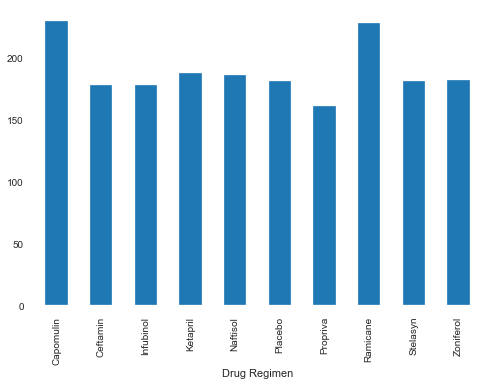

In [115]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regdf = df.groupby('Drug Regimen')
regcount = regdf['Drug Regimen'].count()
regcountbar = regcount.plot(kind='bar')
regcountbar

In [116]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


## Pie plots

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexdf = df.groupby('Sex')
sexcount = sexdf['Sex'].count()
sexcount

Sex
Female    935
Male      958
Name: Sex, dtype: int64

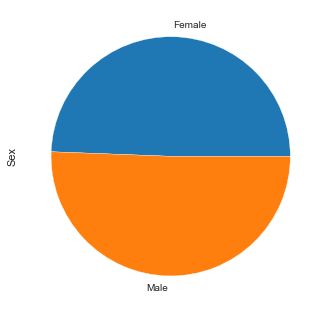

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexcountpie = sexcount.plot(kind='pie')
sexcountpie

In [119]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_tumor_df = df[(df['Drug Regimen']=='Capomulin')&(df['Timepoint']==45)]
capo_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [120]:
capo_tumor_size = capo_tumor_df['Tumor Volume (mm3)']
capo_tumor_size

19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [121]:
quartiles = capo_tumor_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
capo_outliers_tumor = capo_tumor_df [(capo_tumor_df['Tumor Volume (mm3)']<lower_bound) | (capo_tumor_df['Tumor Volume (mm3)']>upper_bound)] 
capo_outliers_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [122]:
ceft_tumor_df = df[(df['Drug Regimen']=='Ceftamin')&(df['Timepoint']==45)]
ceft_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [123]:
ceft_outliers_tumor = ceft_tumor_df[(ceft_tumor_df['Tumor Volume (mm3)']<lower_bound)|(ceft_tumor_df['Tumor Volume (mm3)']>upper_bound)] 

ceft_outliers_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [124]:
infu_tumor_df = df[(df['Drug Regimen']=='Infubinol')&(df['Timepoint']==45)]
infu_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1


In [125]:
infu_outliers_tumor = infu_tumor_df[(infu_tumor_df['Tumor Volume (mm3)']<lower_bound)|(infu_tumor_df['Tumor Volume (mm3)']>upper_bound)] 

infu_outliers_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [126]:
rami_tumor_df = df[(df['Drug Regimen']=='Ramicane')&(df['Timepoint']==45)]
rami_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [127]:
rami_outliers_tumor = rami_tumor_df[(rami_tumor_df['Tumor Volume (mm3)']<lower_bound)|(rami_tumor_df['Tumor Volume (mm3)']>upper_bound)] 

rami_outliers_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Quartiles, outliers and boxplots

([<matplotlib.axis.XTick at 0x133de4d90>,
 <a list of 4 Text xticklabel objects>)

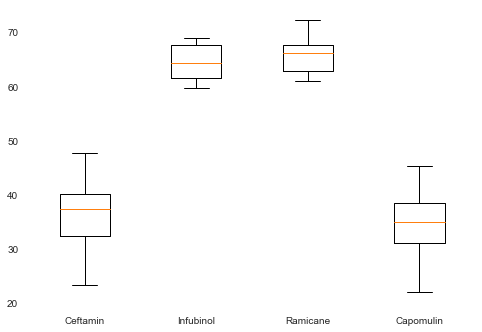

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tsize_regimen = [capo_tumor_df['Tumor Volume (mm3)'],ceft_tumor_df['Tumor Volume (mm3)'],infu_tumor_df['Tumor Volume (mm3)'],rami_tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tsize_regimen)
plt.xticks([1,2,3,4], ['Ceftamin', 'Infubinol', 'Ramicane','Capomulin'])

## Line and scatter plots

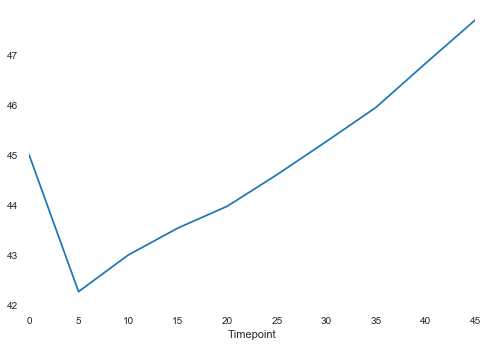

In [129]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = df.loc[df['Mouse ID'].isin(['i557'])]
line_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot()

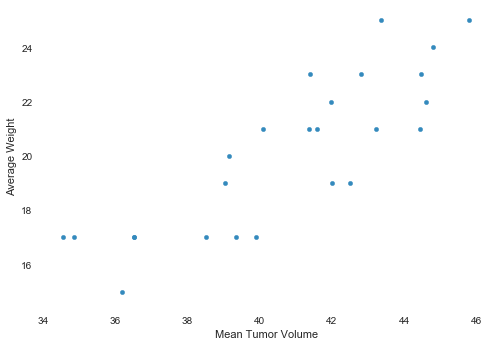

In [130]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capoavgwt_df = df.loc[df['Drug Regimen'].isin(['Capomulin'])]
grpby_scatter = capoavgwt_df.groupby('Mouse ID')
scatter_mean = grpby_scatter['Tumor Volume (mm3)'].mean()
scatter_weight = grpby_scatter['Weight (g)'].mean()

grpby_scatter_dfm = pd.DataFrame(scatter_mean)
grpby_scatter_dfm=grpby_scatter_dfm.rename(columns ={'Tumor Volume (mm3)':'Mean Tumor Volume'})
grpby_scatter_dfm['Average Weight']=scatter_weight
scatter=grpby_scatter_dfm.plot.scatter(x='Mean Tumor Volume', y='Average Weight')


0.84


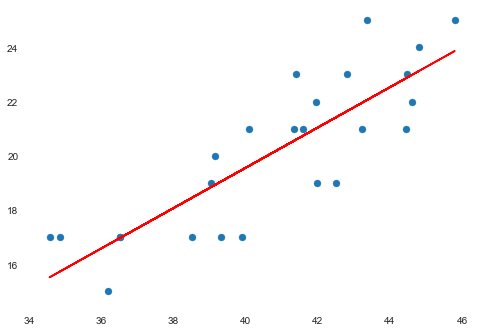

In [131]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(scatter_mean,scatter_weight)[0],2)
print(correlation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_mean, scatter_weight)
regress_values = scatter_mean * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatter_mean, scatter_weight)
plt.plot(scatter_mean,regress_values,"r-")